# Random Forest

In [27]:
from sklearn.datasets import load_digits 
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import seaborn as sn

# Load Data

In [28]:
digits = load_digits()

In [29]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# Visualize some data

<Figure size 640x480 with 0 Axes>

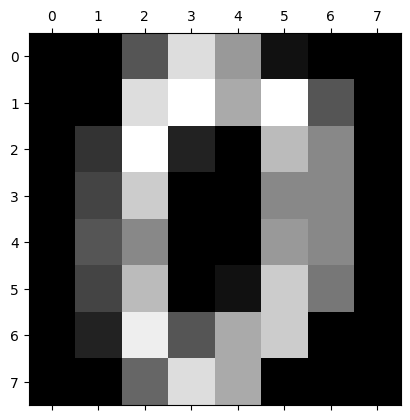

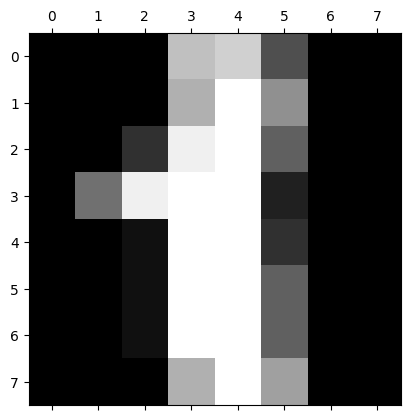

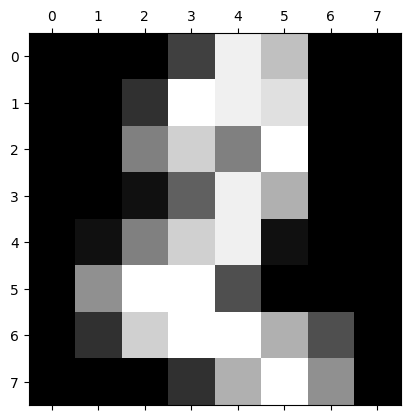

In [30]:
plt.gray()


for i in range(3):
    plt.matshow(digits.images[i])

# Build a DataFrame from MNIST

- each image has 8x8 = 64x pixels

In [31]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [32]:
# Attach the target to the dataframe
df["target"] = digits.target
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [33]:
# Save to CSV File
df.to_csv("./data/MNIST.csv", index = False)

# Split the data

In [34]:
# 1. Split input and output
X = df.drop("target", axis = "columns") 
y = df.target

# 2. Train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 40)



# Build and train the model

In [35]:
# create the model instance
# model = RandomForestClassifier(n_estimators= 50) # n_estimators : count of trees
model = RandomForestClassifier(n_estimators= 30, random_state= 40) # n_estimators : count of trees

# train the model
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=30, random_state=40)

# Scoring

In [36]:
model.score(X_test, y_test)

0.9611111111111111

# Predicitons

In [37]:
y_predicted = model.predict(X_test)

# Confusion Matrix

In [38]:
cm = confusion_matrix(y_test , y_predicted )

Text(50.722222222222214, 0.5, 'Truth')

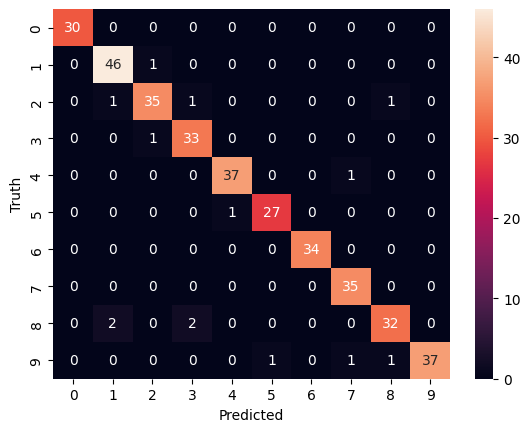

In [39]:
sn.heatmap(cm ,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")